In [1]:
import numpy as np

# Layer 구조 설정

In [2]:
nn_architecture = [
    {"input_dim": 2, "output_dim": 4, "activation": "relu"},
    {"input_dim": 4, "output_dim": 6, "activation": "relu"},
    {"input_dim": 6, "output_dim": 6, "activation": "relu"},
    {"input_dim": 6, "output_dim": 4, "activation": "relu"},
    {"input_dim": 4, "output_dim": 1, "activation": "sigmoid"},
]

# 초기 가중치 랜덤 설정
- 초기 가중치가 모두 동일한 값(0)이 된다면 입력이 무엇이든 Hidden Layer에서의 값도 동일해진다. → 랜덤한 값으로 설정
- 가중치를 작은 값으로 설정하면 첫 번째 반복에서 알고리즘의 효율성이 높아짐 (sigmoid에서 도함수는 큰 값에서 거의 0이기 때문)

In [12]:
def init_layers(nn_architecture, seed = 99):
    np.random.seed(seed)
    number_of_layers = len(nn_architecture)
    params_values = {} # 가중치와 편향을 저장할 리스트

    for idx, layer in enumerate(nn_architecture):
        layer_idx = idx + 1 
        layer_input_size = layer["input_dim"] 
        layer_output_size = layer["output_dim"]
        
        params_values['W' + str(layer_idx)] = np.random.randn(
            layer_output_size, layer_input_size) * 0.1
        params_values['b' + str(layer_idx)] = np.random.randn(
            layer_output_size, 1) * 0.1
        
    return params_values

In [45]:
params_values = init_layers(nn_architecture, seed = 42)
params_values

{'W1': array([[ 0.04967142, -0.01382643],
        [ 0.06476885,  0.15230299],
        [-0.02341534, -0.0234137 ],
        [ 0.15792128,  0.07674347]]),
 'b1': array([[-0.04694744],
        [ 0.054256  ],
        [-0.04634177],
        [-0.04657298]]),
 'W2': array([[ 0.02419623, -0.19132802, -0.17249178, -0.05622875],
        [-0.10128311,  0.03142473, -0.09080241, -0.14123037],
        [ 0.14656488, -0.02257763,  0.00675282, -0.14247482],
        [-0.05443827,  0.01109226, -0.11509936,  0.0375698 ],
        [-0.06006387, -0.02916937, -0.06017066,  0.18522782],
        [-0.00134972, -0.10577109,  0.08225449, -0.12208436]]),
 'b2': array([[ 0.02088636],
        [-0.19596701],
        [-0.1328186 ],
        [ 0.01968612],
        [ 0.07384666],
        [ 0.01713683]]),
 'W3': array([[-0.01156483, -0.03011037, -0.1478522 , -0.07198442, -0.04606388,
          0.10571222],
        [ 0.03436183, -0.17630402,  0.0324084 , -0.03850823, -0.0676922 ,
          0.06116763],
        [ 0.10309995, 

# Activation Function
- 미분의 정의 
$
\displaystyle f'(a) = lim_{a\to0} \frac{f(a+h)-f(a)}{h}
$
 이용

In [37]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def relu(Z):
    return np.maximum(0,Z)

def sigmoid_backward(dA, Z):
    sig = sigmoid(Z)
    return dA * sig * (1 - sig)

def relu_backward(dA, Z):
    dZ = np.array(dA, copy = True)
    dZ[Z <= 0] = 0;
    return dZ;

# Feed Forward
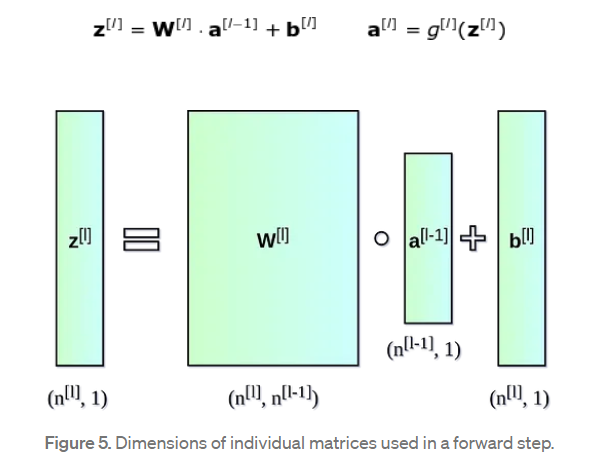

In [49]:
# 1 layer 전진
def single_layer_forward_propagation(A_prev, W_curr, b_curr, activation="relu"):
    Z_curr = np.dot(W_curr, A_prev) + b_curr
    
    if activation == "relu":
        activation_func = relu
    elif activation == "sigmoid":
        activation_func = sigmoid
    else:
        raise Exception('Non-supported activation function')
        
    return activation_func(Z_curr), Z_curr

In [46]:
# 예시 input
ex_A_prv = np.array([1,2]).reshape(2,1)
ex_A_prv

array([[1],
       [2]])

In [48]:
# 예시 input을 넣었을 때 첫번째 hidden layer의 출력값
single_layer_forward_propagation(ex_A_prv, params_values['W1'],params_values['b1'], activation='relu')

(array([[0.        ],
        [0.42363083],
        [0.        ],
        [0.26483525]]),
 array([[-0.02492888],
        [ 0.42363083],
        [-0.1165845 ],
        [ 0.26483525]]))

In [54]:
# 전체 layer 전진
def full_forward_propagation(X, params_values, nn_architecture):
    memory = {} # memory에 각 층의 결과값 저장 (A, Z)
    A_curr = X
    
    for idx, layer in enumerate(nn_architecture): # layer 수 만큼 반복하며 한 층씩 feed forward
        layer_idx = idx + 1 # 층 전진
        A_prev = A_curr 
        
        # A, Z 계산
        activ_function_curr = layer["activation"]
        W_curr = params_values["W" + str(layer_idx)]
        b_curr = params_values["b" + str(layer_idx)]
        A_curr, Z_curr = single_layer_forward_propagation(A_prev, W_curr, b_curr, activ_function_curr)
        
        # memory에 저장
        memory["A" + str(idx)] = A_prev
        memory["Z" + str(layer_idx)] = Z_curr
       
    return A_curr, memory

In [60]:
params_values['W1']

array([[ 0.04967142, -0.01382643],
       [ 0.06476885,  0.15230299],
       [-0.02341534, -0.0234137 ],
       [ 0.15792128,  0.07674347]])

In [53]:
full_forward_propagation(ex_A_prv,params_values, nn_architecture)

(array([[0.4993655]]),
 {'A0': array([[1],
         [2]]),
  'Z1': array([[-0.02492888],
         [ 0.42363083],
         [-0.1165845 ],
         [ 0.26483525]]),
  'A1': array([[0.        ],
         [0.42363083],
         [0.        ],
         [0.26483525]]),
  'Z2': array([[-0.07505745],
         [-0.22005731],
         [-0.18011554],
         [ 0.03433495],
         [ 0.11054447],
         [-0.06000331]]),
  'A2': array([[0.        ],
         [0.        ],
         [0.        ],
         [0.03433495],
         [0.11054447],
         [0.        ]]),
  'Z3': array([[ 0.00161239],
         [-0.20756207],
         [-0.01936693],
         [ 0.04058611],
         [ 0.14956942],
         [-0.04804277]]),
  'A3': array([[0.00161239],
         [0.        ],
         [0.        ],
         [0.04058611],
         [0.14956942],
         [0.        ]]),
  'Z4': array([[ 0.01903536],
         [-0.01462353],
         [-0.21395109],
         [ 0.02714481]]),
  'A4': array([[0.01903536],
        

# Cost Function
- 회귀분석이기 때문에 RMSE와 MSE 사용
- MSE: $\displaystyle\frac{1}{n}\sum_{i=1}^{n} (y-\hat{y})^2$

In [61]:
def get_cost_value(Y_hat, Y):
    n = Y_hat.shape[1]
    cost = (1/n) * np.power((Y_hat-Y),2)
    return np.squeeze(cost)

# Back Propagation
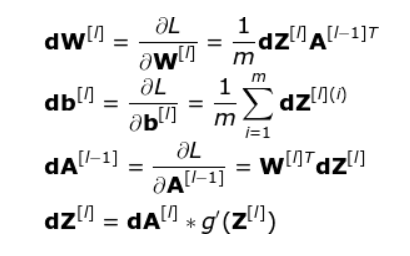

In [66]:
def single_layer_backward_propagation(dA_curr, W_curr, b_curr, Z_curr, A_prev, activation="relu"):
    m = A_prev.shape[1]
    
    if activation == "relu":
        backward_activation_func = relu_backward
    elif activation == "sigmoid":
        backward_activation_func = sigmoid_backward
    else:
        raise Exception('Non-supported activation function')
    
    dZ_curr = backward_activation_func(dA_curr, Z_curr)
    dW_curr = np.dot(dZ_curr, A_prev.T) / m
    db_curr = np.sum(dZ_curr, axis=1, keepdims=True) / m
    dA_prev = np.dot(W_curr.T, dZ_curr)

    return dA_prev, dW_curr, db_curr